In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stat
import seaborn as sns
import matplotlib.pyplot as plt

## About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## About Dataset 


Column Profiling:

    datetime: datetime
    season: season (1: spring, 2: summer, 3: fall, 4: winter)
    holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
    weather:
        1: Clear, Few clouds, partly cloudy, partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp: temperature in Celsius
    atemp: feeling temperature in Celsius
    humidity: humidity
    windspeed: wind speed
    casual: count of casual users
    registered: count of registered users
    count: count of total rental bikes including both casual and registered

In [2]:
df=pd.read_csv('bike_sharing.txt')

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
#There are no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
# Number of Null Datapoints in each Column
df.isna().sum(axis = 0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Datetime

In [8]:
# these are the counts of records 
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df['datetime'].dt.year.value_counts()

2012    5464
2011    5422
Name: datetime, dtype: int64

In [9]:
#
c=pd.DataFrame(df.groupby([df['datetime'].dt.year,df['datetime'].dt.month_name()])['count'].count())
c.reset_index(level=1,inplace=True)
c=c.rename(columns={'datetime':'month'}).reset_index()
c

,datetime,month,count
0,2011,April,455
1,2011,August,456
2,2011,December,456
3,2011,February,446
4,2011,January,431
5,2011,July,456
6,2011,June,456
7,2011,March,446
8,2011,May,456
9,2011,November,456


count of records of each year and with there months

these are counts of each record for each year and month

In [10]:
df.groupby([df['datetime'].dt.year,df['datetime'].dt.month_name()])['count'].sum()

datetime  datetime 
2011      April         50517
          August        83296
          December      61183
          February      32844
          January       23552
          July          92848
          June          89776
          March         38735
          May           79713
          November      70889
          October       79522
          September     79104
2012      April        116885
          August       130220
          December      98977
          February      66269
          January       56332
          July         121769
          June         130957
          March         94766
          May          120434
          November     105551
          October      127912
          September    133425
Name: count, dtype: int64

These are the sum of counts for each year and there months

<AxesSubplot:xlabel='month', ylabel='count'>

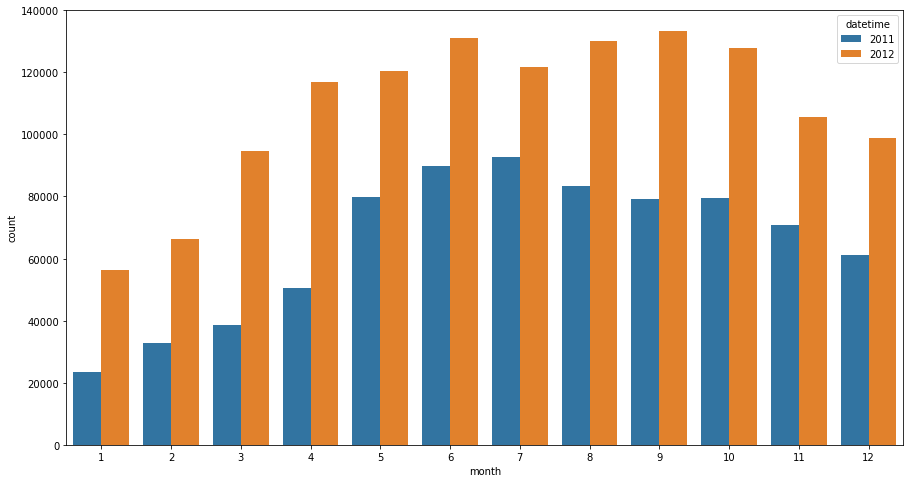

In [11]:
df_year_month=pd.DataFrame(df.groupby([df['datetime'].dt.year,df['datetime'].dt.month])['count'].sum())
df_year_month.reset_index(level=1,inplace=True)
df_year_month=df_year_month.rename(columns={'datetime':'month'}).reset_index()
plt.figure(figsize=(15,8))
sns.barplot(data=df_year_month,x=df_year_month['month'],y=df_year_month['count'],hue=df_year_month['datetime'])

sum of count of total rental bikes in 2012 for all the months  >  sum of count of total rental bikes in 2011 for all the months

as we can see a incresing trends for each months 

max at 9th month  Sept

min at 1st month Jan

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])
max_date = df['datetime'].max().date()
min_date = df['datetime'].min().date()
print(f'The Data set ranges from {max_date} to {min_date}')

The Data set ranges from 2012-12-19 to 2011-01-01


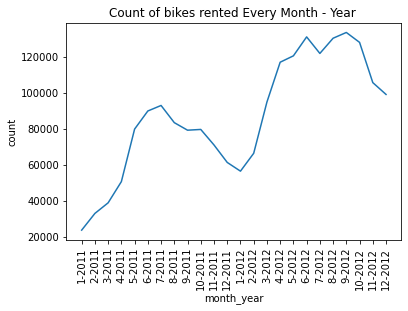

In [13]:
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

d = df.groupby(['year', 'month']).sum()['count'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)

sns.lineplot(x = d['month_year'], y = d['count'] )
plt.xticks(rotation = 90)
plt.title('Count of bikes rented Every Month - Year ')
plt.show()

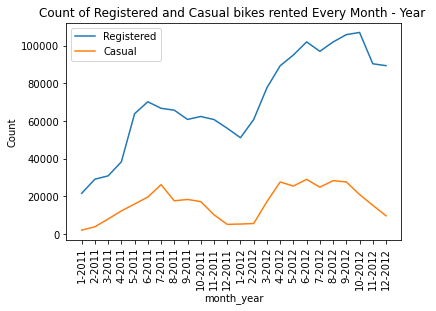

In [14]:
d = df.groupby(['year', 'month']).sum()['registered'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)
sns.lineplot(x = d['month_year'], y = d['registered'], label = 'Registered')

d = df.groupby(['year', 'month']).sum()['casual'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)
sns.lineplot(x = d['month_year'], y = d['casual'], label = 'Casual')

plt.xticks(rotation = 90)
plt.title('Count of Registered and Casual bikes rented Every Month - Year ')
plt.ylabel('Count')
plt.legend()
plt.show()

There is no monotonous increase in the count of bike rentals 

we can see that some months perform poor 

The count of Casual Registered bikes is increasing where as the count of Casual bikes has almost remained the in the same range

### Season

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

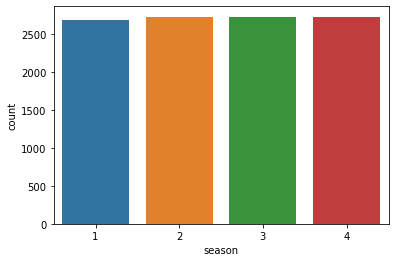

In [15]:
#These are the record counts
sns.countplot(df['season'])

In [16]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [17]:
df_season=df.groupby(df['season'])['count'].sum().reset_index()
df_season

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


<AxesSubplot:xlabel='season', ylabel='count'>

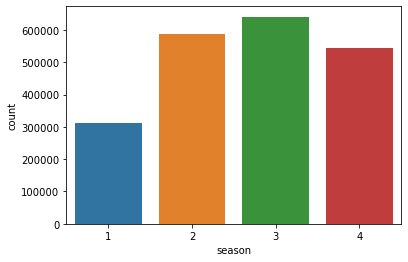

In [18]:
sns.barplot(data=df_season,x='season',y='count')

Most number of the bike rentals happens in season 3 ie fall season 

less numer of the bike rentals happens in season 1 ie spring

(1: spring, 2: summer, 3: fall, 4: winter)


### Holiday

In [19]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [20]:
df_holiday=df.groupby(df['holiday'])['count'].sum().reset_index()
df_holiday

,holiday,count
0,0,2027668
1,1,57808


<AxesSubplot:xlabel='holiday', ylabel='count'>

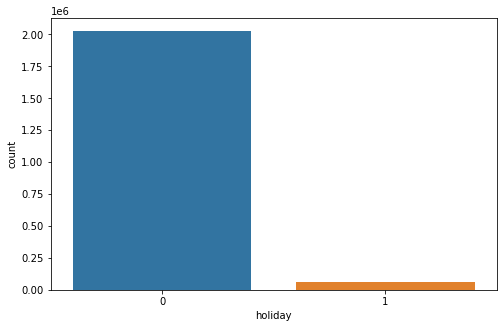

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_holiday,x='holiday',y='count')

0 means there is no holiday 

1 means there is a holiday 

As per this plot count of total bike rentals happens when there is no holiday

### WorkingDay

In [22]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [23]:
df_work=df.groupby(df['workingday'])['count'].sum().reset_index()
df_work

,workingday,count
0,0,654872
1,1,1430604


<AxesSubplot:xlabel='workingday', ylabel='count'>

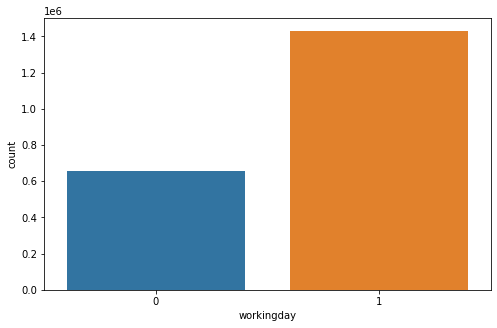

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_work,x='workingday',y='count')

1 : if neither a holiday or a weekend 

0: its either a holiday or a weekend

As per this plot count of total bike rentals happens when there is no holiday ie on working days

In [25]:
# since there working day and holiday are dependent lets see this


In [26]:
df_info_h_w=df.groupby([df['holiday'],df['workingday']])['count'].sum().reset_index()
df_info_h_w['holiday']=df_info_h_w['holiday'].apply(lambda x : "holiday" if(x==1) else "not a holiday")
df_info_h_w['workingday']=df_info_h_w['workingday'].apply(lambda x : "working day" if(x==1) else "not a working day")
df_info_h_w

,holiday,workingday,count
0,not a holiday,not a working day,597064
1,not a holiday,working day,1430604
2,holiday,not a working day,57808


<AxesSubplot:xlabel='workingday', ylabel='count'>

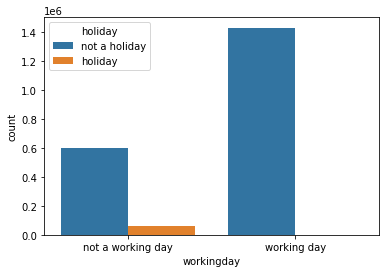

In [27]:
sns.barplot(data=df_info_h_w,x='workingday',y='count',hue='holiday')

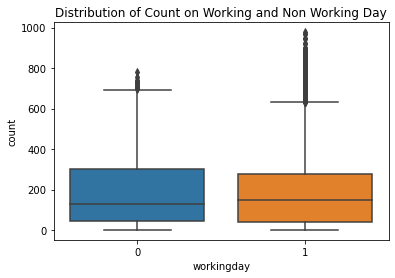

In [28]:
sns.boxplot(data = df, y = 'count', x = 'workingday')
plt.title('Distribution of Count on Working and Non Working Day')
plt.show()

### Weather

In [29]:
df_weather=df.groupby(df['weather'])['count'].sum().reset_index()
df_weather

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


<AxesSubplot:xlabel='weather', ylabel='count'>

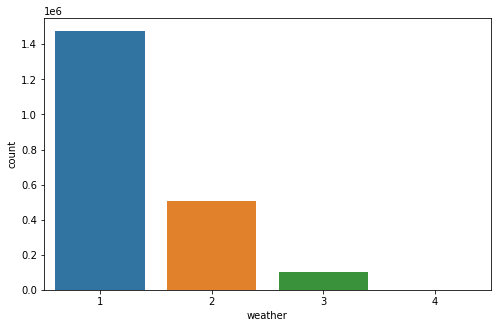

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_weather,x='weather',y='count')

Most of the bike rental counts happens when the weather condition is 1: Clear, Few clouds, partly cloudy, partly cloudy

## Temperature

In [31]:
df['temp'].nunique()

49

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

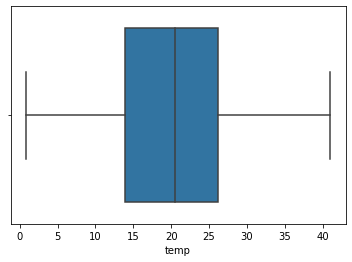

In [32]:
sns.boxplot(df['temp'])

In [33]:
df['temp'].value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

<AxesSubplot:xlabel='temp', ylabel='Count'>

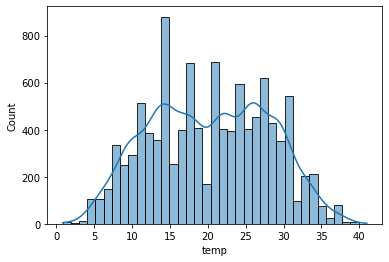

In [34]:
sns.histplot(df['temp'],kde=True)

In [35]:
df['temp'].mean()

20.230859819952173

In [36]:
df['temp'].min()

0.82

In [37]:
df['temp'].max()

41.0

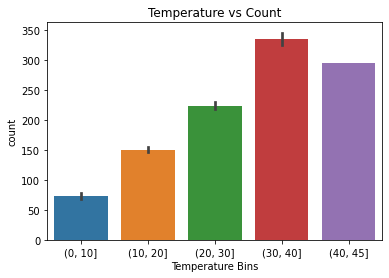

In [38]:
df['temp_cat'] = pd.cut(df['temp'], bins = [0, 10, 20, 30, 40, 45] )
sns.barplot(data = df, x = 'temp_cat', y = 'count')
plt.title('Temperature vs Count')
plt.xlabel('Temperature Bins')
plt.show()

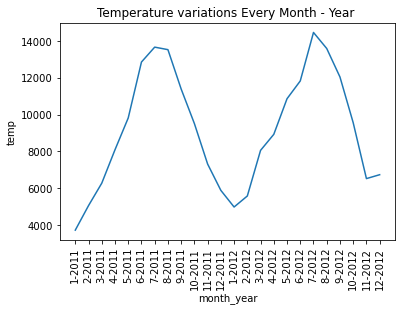

In [39]:
d = df.groupby(['year', 'month']).sum()['temp'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)

sns.lineplot(x = d['month_year'], y = d['temp'] )
plt.xticks(rotation = 90)
plt.title('Temperature variations Every Month - Year ')
plt.show()

The number of bikes rented was least on days when Temperature was in the range of (0-10]. 

The number of bikes rented was max on days when Temperature was in range (30-40].

The Temperature went the all time low in the month of January 2012

### aTemperature (feeling Temperature)

In [40]:
df['atemp'].nunique()

60

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='atemp'>

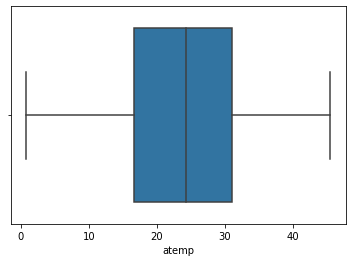

In [41]:
sns.boxplot(df['atemp'],orient='v')

<AxesSubplot:xlabel='atemp', ylabel='Count'>

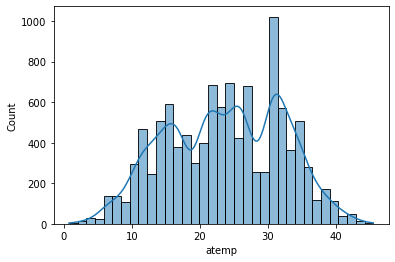

In [42]:
sns.histplot(df['atemp'],kde=True)

In [43]:
df['atemp'].mean()

23.65508405291192

In [44]:
df['atemp'].min()

0.76

In [45]:
df['atemp'].max()

45.455

In [46]:
dfiff_temp_atemp=abs(df['temp']-df['atemp'])

<AxesSubplot:ylabel='Count'>

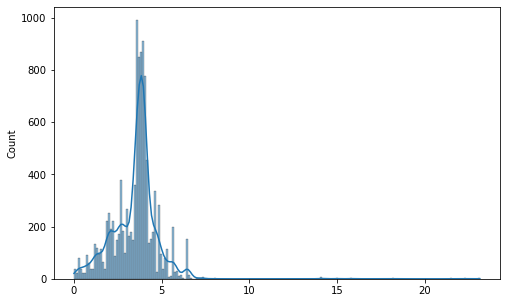

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(dfiff_temp_atemp,kde=True)

In [48]:
# Converting the Continous variable into Categorical

df['atemp_cat'] = pd.cut(df['atemp'], bins = [0, 10, 20, 30, 40, 50] )

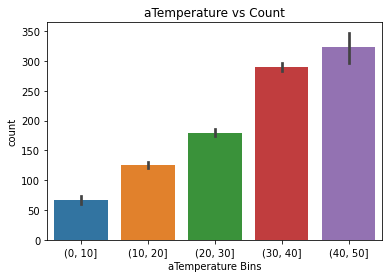

In [49]:
sns.barplot(data = df, x = 'atemp_cat', y = 'count')
plt.title('aTemperature vs Count')
plt.xlabel('aTemperature Bins')
plt.show()

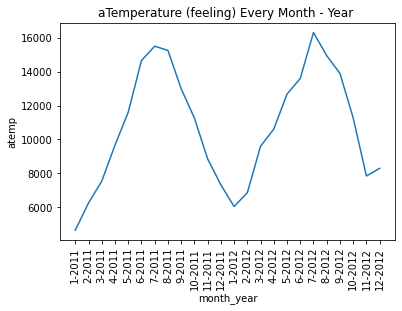

In [50]:
d = df.groupby(['year', 'month']).sum()['atemp'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)

sns.lineplot(x = d['month_year'], y = d['atemp'] )
plt.xticks(rotation = 90)
plt.title('aTemperature (feeling) Every Month - Year ')
plt.show()

The average number of bikes rented was least on days when Temperature was in the range of (0-10]. 

The average number of bikes rented was maximum on days when Temperature was in range (40-50]

### Humidity

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='humidity'>

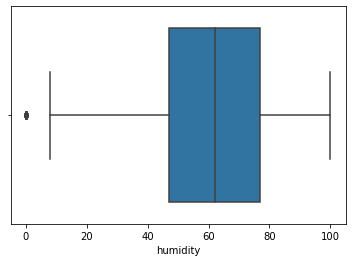

In [51]:
sns.boxplot(df['humidity'])

There is some outliers 

In [52]:
df['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [53]:
def detetct_out(df,a):
    q1=np.quantile(df[a],0.25)
    q3=np.quantile(df[a],0.75)
    low_end=q1-1.5*(q3-q1)
    high_end=q3+1.5*(q3-q1)
    b=df[df[a]>high_end][a].tolist()
    c=df[df[a]<low_end][a].tolist()
    b=set(b)
    c=set(c)
    print("Outliers")
    print("Outliers which has high values --->",b)
    print("---------------------------------------------------")
    print("Outliers which has low values --->",c)
def outlier(data):
    '''
    Function to Identify Outliers                                                                                                                            
    '''
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    upper_limit = np.percentile(data, 75) + iqr*1.5 
    lower_limit = np.percentile(data, 25) - iqr*1.5 
    return data[(data<lower_limit) | (data>upper_limit)]

In [54]:
detetct_out(df,'humidity')

Outliers
Outliers which has high values ---> set()
---------------------------------------------------
Outliers which has low values ---> {0}


In [55]:
detetct_out(df,'temp')

Outliers
Outliers which has high values ---> set()
---------------------------------------------------
Outliers which has low values ---> set()


In [56]:
detetct_out(df,'atemp')

Outliers
Outliers which has high values ---> set()
---------------------------------------------------
Outliers which has low values ---> set()


### WindSpeed

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

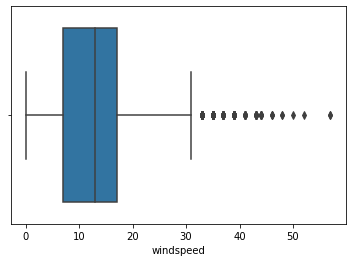

In [57]:
sns.boxplot(df['windspeed'])

In [58]:
detetct_out(df,'windspeed')

Outliers
Outliers which has high values ---> {32.9975, 35.0008, 36.9974, 39.0007, 40.9973, 43.9989, 43.0006, 46.0022, 47.9988, 50.0021, 51.9987, 56.9969}
---------------------------------------------------
Outliers which has low values ---> set()


In [59]:
detetct_out(df,'casual')

Outliers
Outliers which has high values ---> {117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 272, 274, 275, 276, 279, 280, 282, 283, 284, 286, 287, 288, 289, 291, 292, 293, 294, 295, 297, 298, 299, 304, 308, 310, 311, 312, 317, 320, 321, 325, 326, 327, 331, 332, 350, 352, 354, 355, 356, 357, 361, 362,

In [60]:
detetct_out(df,'registered')

Outliers
Outliers which has high values ---> {512, 513, 514, 515, 516, 517, 518, 521, 522, 523, 525, 527, 529, 530, 531, 532, 533, 534, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 570, 571, 572, 573, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 586, 589, 591, 593, 594, 595, 596, 597, 598, 601, 602, 603, 604, 605, 608, 609, 610, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 628, 629, 631, 633, 634, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 655, 656, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 672, 673, 675, 677, 678, 679, 680, 681, 682, 684, 688, 689, 690, 692, 693, 694, 696, 697, 698, 699, 700, 702, 703, 704, 706, 708, 709, 711, 712, 713, 715, 716, 718, 719, 720, 723, 725, 726, 727, 733, 734, 735, 737, 739, 740, 741, 742, 743, 744, 745, 746, 749, 750, 751, 756, 757, 758, 761,

### Bi variant 

In [61]:
workingday_count = df[df['workingday']==1]['count'].values

non_Workingday_count = df[df['workingday']==0]['count'].values

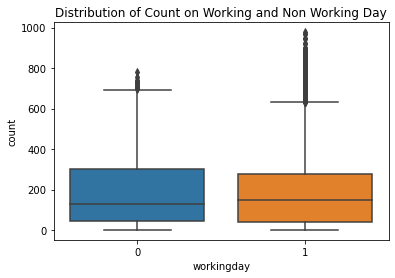

In [62]:
sns.boxplot(data = df, y = 'count', x = 'workingday')
plt.title('Distribution of Count on Working and Non Working Day')
plt.show()

In [63]:
d = df.groupby(['year', 'month']).sum()['atemp'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)


c = df.groupby(['year', 'month']).sum()['temp'].reset_index()
d['temp']=c['temp']

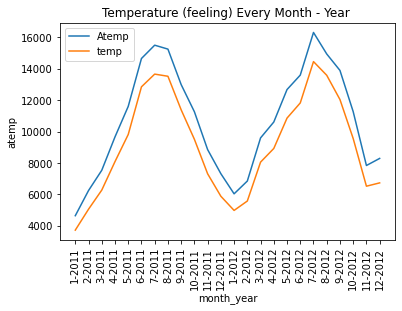

In [64]:
sns.lineplot(x = d['month_year'], y = d['atemp'] ,label='Atemp')
sns.lineplot(x = d['month_year'], y = d['temp'] ,label='temp')
plt.xticks(rotation = 90)
plt.title('Temperature (feeling) Every Month - Year ')
plt.show()

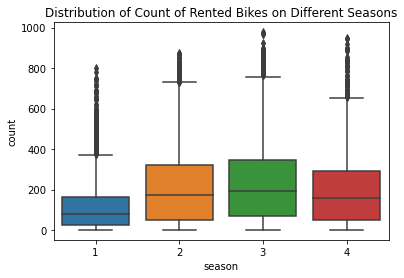

In [65]:
sns.boxplot(data = df, y = 'count', x = 'season')
plt.title('Distribution of Count of Rented Bikes on Different Seasons')
plt.show()

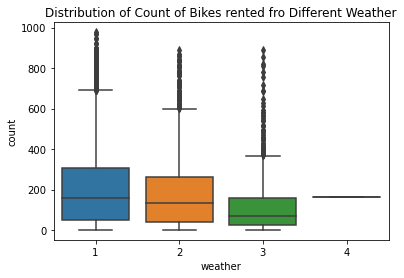

In [66]:
sns.boxplot(data = df, y = 'count', x = 'weather')
plt.title('Distribution of Count of Bikes rented fro Different Weather')
plt.show()

Text(0.5, 1.0, 'Occurance of different Seasons along with different Weather')

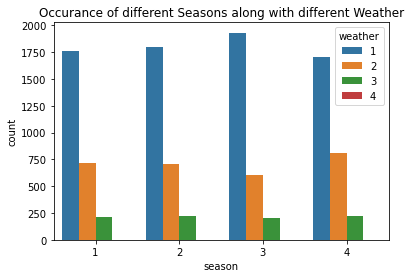

In [67]:
sns.countplot(data = df, x = 'season', hue = 'weather')
plt.title('Occurance of different Seasons along with different Weather')

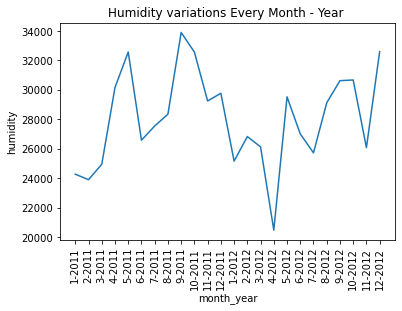

In [68]:
d = df.groupby(['year', 'month']).sum()['humidity'].reset_index()
d['month_year'] = d['month'].astype(str) +'-'+ d['year'].astype(str)

sns.lineplot(x = d['month_year'], y = d['humidity'] )
plt.xticks(rotation = 90)
plt.title('Humidity variations Every Month - Year ')
plt.show()

## HYPOTHISIS TESTING

Visual analysis (1)

Hypothesis formulation (1)

Select the appropriate test (1)

Check test assumptions (2)

Find the p-value(1)

Conclusion based on the p-value (2)


Working Day has effect on number of electric cycles rented

<AxesSubplot:xlabel='workingday', ylabel='count'>

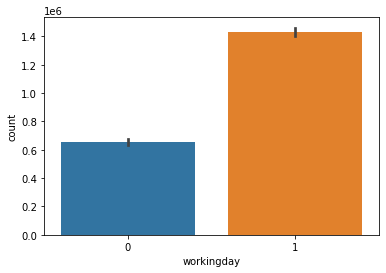

In [69]:
sns.barplot(data=df,x='workingday',y='count',estimator=np.sum)

Sum of Total counts on rented bikes are more for working day=1 

<AxesSubplot:xlabel='workingday', ylabel='count'>

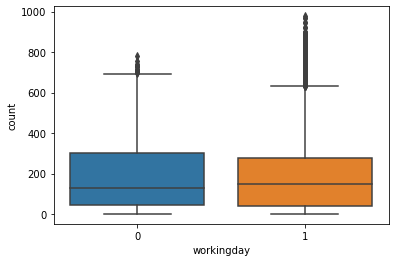

In [70]:
sns.boxplot(data=df,x='workingday',y='count')

The means of both groups looks similar 

<AxesSubplot:xlabel='count', ylabel='Density'>

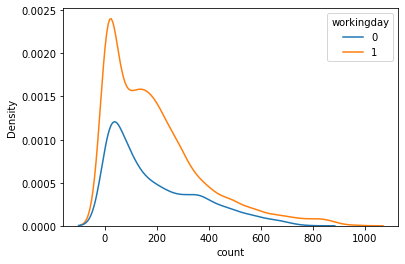

In [71]:
sns.kdeplot(data=df,x='count',hue='workingday')

the dristribution of the two groups looks simliar

Now we will test how significantly say that these are similar or different

#### Hypothesis Testing

##### Ho - The count of Bikes rented on Working and Non Working Day is same. (mu_workring=mu_not_working)

##### Ha - The count of Bikes rented on Working and Non Working Day not is same.(mu_workring != mu_not_working)

###### To check the above we use Two Tailed Two sample T test.

#### Assumptions of Student's T Test - 
* The Data follows normal Distribution
* The Data is sampled Independently and Randomly.
* Homogenity of Variance - the two populations compared should have the same variance.

In [72]:
workingday_count = df[df['workingday']==1]['count'].values

non_Workingday_count = df[df['workingday']==0]['count'].values

((array([-3.73592685, -3.50654119, -3.38040512, ...,  3.38040512,
          3.50654119,  3.73592685]),
  array([  1,   1,   1, ..., 968, 970, 977], dtype=int64)),
 (172.21129312911785, 193.01187263896384, 0.9329510592827184))

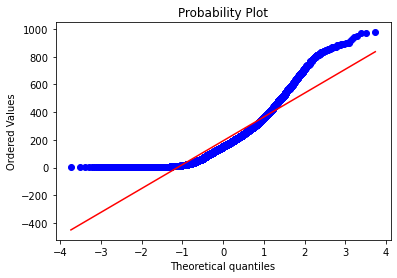

In [73]:
stat.probplot(workingday_count, dist="norm",plot=plt)

((array([-3.54073861, -3.29951448, -3.16625247, ...,  3.16625247,
          3.29951448,  3.54073861]),
  array([  1,   1,   1, ..., 743, 757, 783], dtype=int64)),
 (163.61448976764962, 188.50662061024755, 0.9410724052425977))

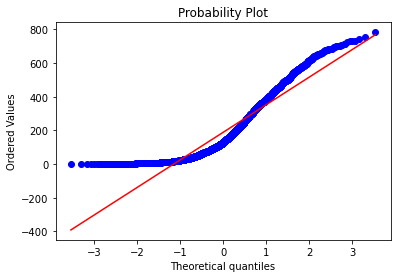

In [74]:
stat.probplot(non_Workingday_count, dist="norm",plot=plt)

These are not seems to be normally dristibuted using qq plot

In [75]:
# we will use Shapiro-wilk test to check normailty of the samples
# we will take 300 samples from each groups and check normality
import random

In [76]:
#Ho=the sample comes from a normal distribution
#Ha=the sample does not comes from a normal distribution
#at significance of 5%
stat.shapiro(random.sample(workingday_count.tolist(),300))

ShapiroResult(statistic=0.8614941835403442, pvalue=9.710049011726766e-16)

In [77]:
stat.shapiro(random.sample(non_Workingday_count.tolist(),300))

ShapiroResult(statistic=0.8925567269325256, pvalue=9.993134114259436e-14)

Since p vale is less than 5 % we will reject null hypothisis and accpect alternate hyp

these two samples are not from normal drstibution

In [78]:
#### Testing Homogenity of Variance
#Ho=the variance among groups is equal
#Ha=the variance among groups is not equal

In [79]:
stat.levene(workingday_count, non_Workingday_count)

LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)

Since the pValue is greater than 0.05, we can say that the variance of both the samples is not statistically different.

Since these sample are not normally dristibuted ,

For now we will check with T-test

##### Ho - The count of Bikes rented on Working and Non Working Day is same. (mu_workring=mu_not_working)

##### Ha - The count of Bikes rented on Working and Non Working Day not is same.(mu_workring != mu_not_working)

In [80]:
stat.ttest_ind(workingday_count, non_Workingday_count)

Ttest_indResult(statistic=1.2096277376026694, pvalue=0.22644804226361348)

#### Conclusion - Since the P Value is gretaer than Significance level = 0.05, we Fail to reject the Null Hypothesis, and conclude that Count of bikes rented on Working day and non Working day is not Statistcally different.

In [81]:
#We can try some non parametric test

In [82]:
#Ho=Two samples come from same dristribution
#Ha=Two samples do not come from same dristribution

In [83]:
stat.ks_2samp(workingday_count, non_Workingday_count)

KstestResult(statistic=0.05570196737090361, pvalue=8.003959314217823e-07)

By using non parametric test like ks test

since p vale is less than significance value of 0.05 

we reject null hypothisis

these two samples come from different dristribution

In [84]:
#Man whittney u test
#(H0) is that the two populations are equal
#Ha =is that the two populations are  not equal

In [85]:
stat.mannwhitneyu(workingday_count, non_Workingday_count)

MannwhitneyuResult(statistic=12868495.5, pvalue=0.48395699769570394)

Since p vale is greater that significance we accpect null hypothisi

The means of the both groups are same and conclude that Count of bikes rented on Working day and non Working day is not Statistcally different.

#### No. of cycles rented similar or different in different seasons

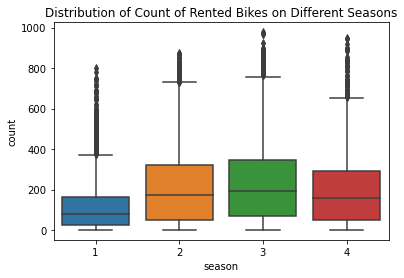

In [86]:
sns.boxplot(data = df, y = 'count', x = 'season')
plt.title('Distribution of Count of Rented Bikes on Different Seasons')
plt.show()

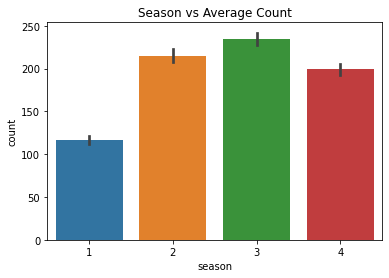

In [87]:
sns.barplot(data = df, x = df['season'], y = df['count'])
plt.title('Season vs Average Count')
plt.show()

In [88]:
x = outlier(df[df['season']==1]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Season 1 = {len(x)}')

x = outlier(df[df['season']==2]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Season 2 = {len(x)}')

x = outlier(df[df['season']==3]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Season 3 = {len(x)}')

x = outlier(df[df['season']==4]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Season 4 = {len(x)}')

The Number of possible outliers in Count of Bikes rented in Season 1 = 139
The Number of possible outliers in Count of Bikes rented in Season 2 = 42
The Number of possible outliers in Count of Bikes rented in Season 3 = 61
The Number of possible outliers in Count of Bikes rented in Season 4 = 64


In [89]:
season1_count = df[df['season']==1]['count']
season2_count = df[df['season']==2]['count']
season3_count = df[df['season']==3]['count']
season4_count = df[df['season']==4]['count']

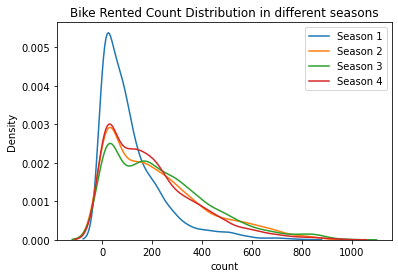

In [90]:
sns.kdeplot(season1_count, label = 'Season 1')
sns.kdeplot(season2_count, label = 'Season 2')
sns.kdeplot(season3_count, label = 'Season 3')
sns.kdeplot(season4_count, label = 'Season 4')
plt.legend()
plt.title('Bike Rented Count Distribution in different seasons')
plt.show()

In [91]:
#### Testing Homogenity of Variance
#Ho=the variance among groups is equal
#Ha=the variance among groups is not equal

In [92]:
stat.levene(season1_count, season2_count, season3_count, season4_count)

LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)

Since the P Value is very small, the Variance of the Samples is Significantly Different

((array([-3.47228304, -3.22661884, -3.09065989, ...,  3.09065989,
          3.22661884,  3.47228304]),
  array([  1,   1,   1, ..., 749, 782, 801], dtype=int64)),
 (112.76736871266657, 116.34326135517497, 0.8992877915950636))

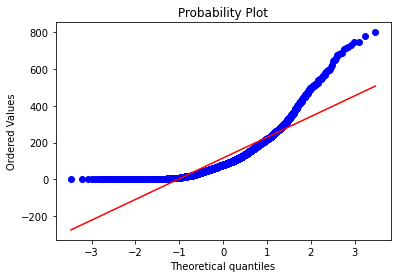

In [93]:
stat.probplot(season1_count, dist="norm",plot=plt)

((array([-3.47693624, -3.2315789 , -3.09580678, ...,  3.09580678,
          3.2315789 ,  3.47693624]),
  array([  1,   1,   1, ..., 868, 869, 873], dtype=int64)),
 (182.42737385795175, 215.25137211855102, 0.9491907117737897))

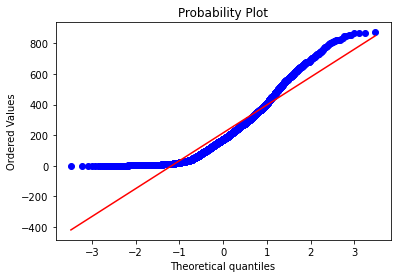

In [94]:
stat.probplot(season2_count, dist="norm",plot=plt)

((array([-3.47693624, -3.2315789 , -3.09580678, ...,  3.09580678,
          3.2315789 ,  3.47693624]),
  array([  1,   1,   1, ..., 968, 970, 977], dtype=int64)),
 (188.7903332981574, 234.41712403951698, 0.9566723243576184))

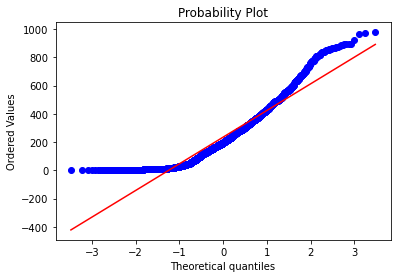

In [95]:
stat.probplot(season3_count, dist="norm",plot=plt)

((array([-3.47703432, -3.23168344, -3.09591525, ...,  3.09591525,
          3.23168344,  3.47703432]),
  array([  1,   1,   1, ..., 917, 943, 948], dtype=int64)),
 (168.27167256266745, 198.98829553767374, 0.9464459779766073))

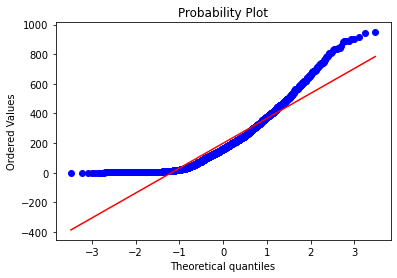

In [96]:
stat.probplot(season4_count, dist="norm",plot=plt)

In [97]:
#Ho=the sample comes from a normal distribution
#Ha=the sample does not comes from a normal distribution
#at significance of 5%
stat.shapiro(random.sample(season1_count.tolist(),300))

ShapiroResult(statistic=0.7928853631019592, pvalue=3.070025008799215e-19)

In [98]:
stat.shapiro(random.sample(season2_count.tolist(),300))

ShapiroResult(statistic=0.8868193626403809, pvalue=3.979319112179698e-14)

In [99]:
stat.shapiro(random.sample(season3_count.tolist(),300))

ShapiroResult(statistic=0.9043588638305664, pvalue=7.432061151398106e-13)

In [100]:
stat.shapiro(random.sample(season4_count.tolist(),300))

ShapiroResult(statistic=0.8929358124732971, pvalue=1.0632639923678286e-13)

For all samples the p value is less than 5% so we reject null hypothisis

These sample does not comes from normal dristribution

#### From The above plot, The data does not follow Normal ditributioon.
#### If we assume that the Data Satisfies all the assumptions of ANOVA

#### Hypothesis Testing

##### Ho - The count of Bikes rented in different seasons are Same.

##### Ha - The count of Bikes rented in different seasons are different.

In [101]:
stat.f_oneway(season1_count, season2_count, season3_count, season4_count)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

#### Becuase the P value is less than the Significance level (0.05), we reject the null Hypothesis and conclude that Number of bikes rented in different seasons are Statistically Different

#### Assumptions for ANOVA 
* Populations from which samples are drawn should be normal.
* These sample distribution should have nearly the same variance.
* Samples should be drawn randomly and independently. 


#### If we dont make any assumption about Population' s Distribution, we can use Kruskal instead of ANOVA 

In [102]:
stat.kruskal(season1_count, season2_count, season3_count, season4_count)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

#### Conclusion - Becuase the P value is less than the Significance level (0.05), we reject the null Hypothesis and conclude that Number of bikes rented in different seasons are Statistically Different

### No. of cycles rented similar or different in different weather

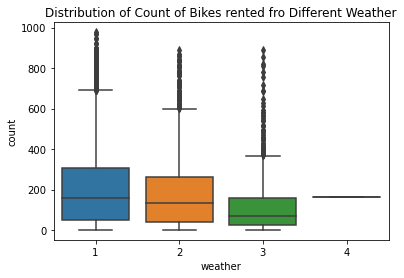

In [103]:
sns.boxplot(data = df, y = 'count', x = 'weather')
plt.title('Distribution of Count of Bikes rented fro Different Weather')
plt.show()

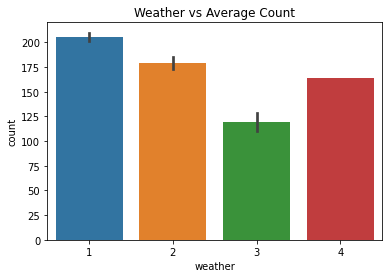

In [104]:
sns.barplot(data = df, x = df['weather'], y = df['count'])
plt.title('Weather vs Average Count')
plt.show()

In [105]:
x = outlier(df[df['weather']==1]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Weather 1 = {len(x)}')

x = outlier(df[df['weather']==2]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Weather 2 = {len(x)}')

x = outlier(df[df['weather']==3]['count'])
print(f'The Number of possible outliers in Count of Bikes rented in Weather 3 = {len(x)}')

The Number of possible outliers in Count of Bikes rented in Weather 1 = 160
The Number of possible outliers in Count of Bikes rented in Weather 2 = 82
The Number of possible outliers in Count of Bikes rented in Weather 3 = 56


#### Note - Since We only have single record for weather 4, we will not consider it in the analysis

#### Hypothesis Testing

##### Ho - The count of Bikes rented in different Weathers are Same.

##### Ha - The count of Bikes rented in different Weathers are different.

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


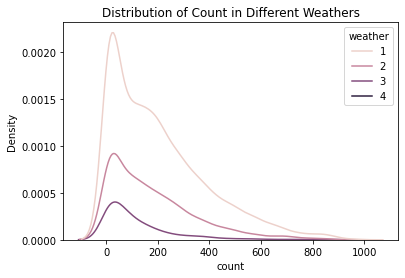

In [106]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')
plt.title('Distribution of Count in Different Weathers')
plt.show()

In [107]:
weather1_count = df[df['weather']==1]['count']
weather2_count = df[df['weather']==2]['count']
weather3_count = df[df['weather']==3]['count']

#### Testing for equavalance of Variance
#### Testing Homogenity of Variance
#Ho=the variance among groups is equal

#Ha=the variance among groups is not equal

In [108]:
stat.levene(weather1_count, weather2_count, weather3_count)

LeveneResult(statistic=81.67574924435011, pvalue=6.198278710731511e-36)

Since the P Value is less than 0.05, we can assume that the Difference of Variance is Statistically Different

((array([-3.72833929, -3.49851474, -3.37211613, ...,  3.37211613,
          3.49851474,  3.72833929]),
  array([  1,   1,   1, ..., 968, 970, 977], dtype=int64)),
 (177.5025626498455, 205.23679087875414, 0.9439766522111214))

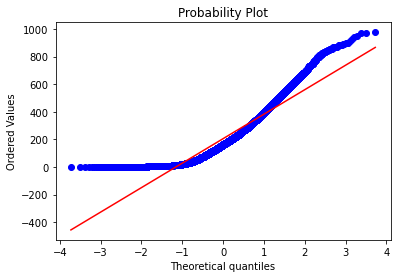

In [109]:
stat.probplot(weather1_count, dist="norm",plot=plt)

((array([-3.48665304, -3.24193409, -3.10655043, ...,  3.10655043,
          3.24193409,  3.48665304]),
  array([  1,   1,   1, ..., 862, 868, 890], dtype=int64)),
 (157.82398189829604, 178.95553987297103, 0.9365111227539785))

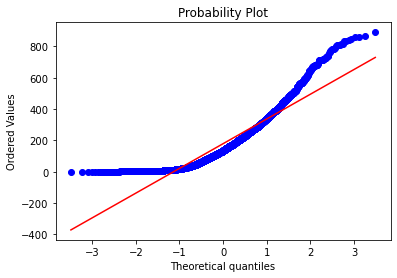

In [110]:
stat.probplot(weather2_count, dist="norm",plot=plt)

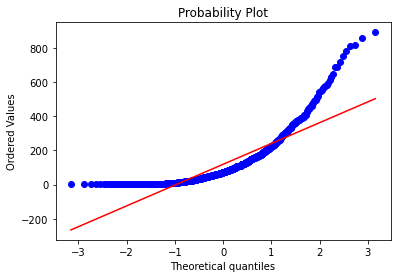

In [111]:
stat.probplot(weather3_count, dist="norm",plot=plt)
plt.show()

In [112]:
#Ho=the sample comes from a normal distribution
#Ha=the sample does not comes from a normal distribution
#at significance of 5%
stat.shapiro(random.sample(weather1_count.tolist(),300))

ShapiroResult(statistic=0.8817917108535767, pvalue=1.823170656329101e-14)

In [113]:
stat.shapiro(random.sample(weather2_count.tolist(),300))

ShapiroResult(statistic=0.8714669942855835, pvalue=3.9371505933401794e-15)

In [114]:
stat.shapiro(random.sample(weather3_count.tolist(),300))

ShapiroResult(statistic=0.7860102653503418, pvalue=1.535640127689382e-19)

For all samples the p value is less than 5% so we reject null hypothisis

These sample does not comes from normal dristribution

#### For this if we assume the Data follows all the assumptions of ANOVA

##### Ho - The count of Bikes rented in different Weathers are Same.

##### Ha - The count of Bikes rented in different Weathers are different.

In [115]:
stat.f_oneway(weather1_count, weather2_count, weather3_count)  

F_onewayResult(statistic=98.28356881946706, pvalue=4.976448509904196e-43)

#### Because the P value is less than the significance level (0.05), we reject the null hypothesis and conclude that  Number of bikes rented in different Weathers are Statistically Different

In [116]:
stat.kruskal(weather1_count, weather2_count, weather3_count)  

KruskalResult(statistic=204.95566833068537, pvalue=3.122066178659941e-45)

 Because the P value is less than the significance level (0.05), we reject the null hypothesis and conclude that  Number of bikes rented in different Weathers are Statistically Different
 
 From the data we can say that most number of bikes were rented during Weather 1 followed by Weather 2 and 3.

### Weather is dependent on season (check between 2 predictor variable)

Text(0.5, 1.0, 'Occurance of different Seasons along with different Weather')

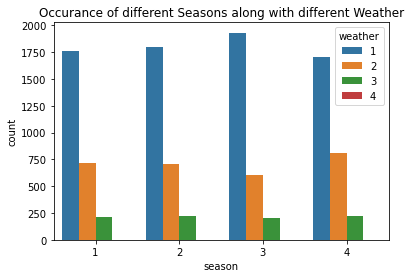

In [117]:
sns.countplot(data = df, x = 'season', hue = 'weather')
plt.title('Occurance of different Seasons along with different Weather')

In [118]:
a = pd.crosstab(df['weather'], df['season'])
a

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


#### Hypothesis Testing

##### Ho - Weather and Climate are Independent.

##### Ha -  Weather and Climate are Dependent.

##### To check this we use  Chi Square Test


#### Assumptions of Chi2 test
* Variables are categorical
* Observations are independent
* Each cell is mutually exclusive
* Expected value in each cell is greater than 5 (at least in 80% of cells)


In [119]:
stat.chi2_contingency(a.iloc[:3])

(46.101457310732485,
 2.8260014509929403e-08,
 6,
 array([[1774.04869086, 1805.76352779, 1805.76352779, 1806.42425356],
        [ 699.06201194,  711.55920992,  711.55920992,  711.81956821],
        [ 211.8892972 ,  215.67726229,  215.67726229,  215.75617823]]))

#### Since the P Value is less than the Significance level 0.05, we reject the Null hypothesis and conclude that Weather and Climate have Dependance